In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler



[0]	validation_0-rmse:49.45926	validation_1-rmse:38.07302
[1]	validation_0-rmse:46.14695	validation_1-rmse:36.60925
[2]	validation_0-rmse:43.09807	validation_1-rmse:35.32780
[3]	validation_0-rmse:40.29585	validation_1-rmse:34.40576
[4]	validation_0-rmse:37.70748	validation_1-rmse:33.52834
[5]	validation_0-rmse:35.29607	validation_1-rmse:32.50743
[6]	validation_0-rmse:33.06835	validation_1-rmse:31.67929
[7]	validation_0-rmse:31.00047	validation_1-rmse:30.91176
[8]	validation_0-rmse:29.07278	validation_1-rmse:30.27362
[9]	validation_0-rmse:27.28041	validation_1-rmse:29.73213
[10]	validation_0-rmse:25.60726	validation_1-rmse:29.29783
[11]	validation_0-rmse:24.05278	validation_1-rmse:28.99846
[12]	validation_0-rmse:22.60386	validation_1-rmse:28.73341
[13]	validation_0-rmse:21.25627	validation_1-rmse:28.53694
[14]	validation_0-rmse:19.99969	validation_1-rmse:28.39690
[15]	validation_0-rmse:18.82093	validation_1-rmse:28.24556
[16]	validation_0-rmse:17.72275	validation_1-rmse:28.07417
[17]	va

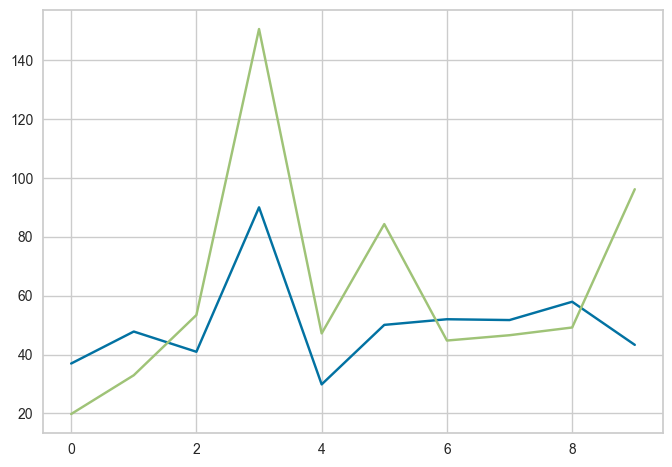

In [17]:
file_path = './source_data/A1.xlsx'
in_window_length = 20
out_window_length = 10

max_min_scaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))


data = pd.read_excel(file_path)
data.columns = ['date1','sample_code','name','sales','values']
data= data[data['values']>=0]
data['year'] = data['date1']//100
data['month'] = data['date1']%100
data = data[['year','month','sales','values']]
X = []
y = []

L = len(data)
for i in range(L):
    if i+in_window_length+out_window_length >= L:
        break
    X.append(data[i:i+in_window_length].values.tolist())
    y.append(data['sales'][i+in_window_length:i+in_window_length+out_window_length].values.tolist())

X = np.array(X)
X = X.reshape(X.shape[0],-1)



train_num = 60
X_train,y_train,X_test,y_test= X[:train_num],y[:train_num],X[train_num:],y[train_num:]

model = xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,early_stopping_rounds=10)
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)])

y_pred = model.predict(X_test[-2:-1])
print("mse:",mean_squared_error(y_test[-2:-1],y_pred))
plt.plot(range(len(y_pred[0])),y_pred[0])
plt.plot(range(len(y_test[-2:-1][0])),y_test[-2:-1][0])





total_mse: 764.6480389002178
mse: 849.0199887506176


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


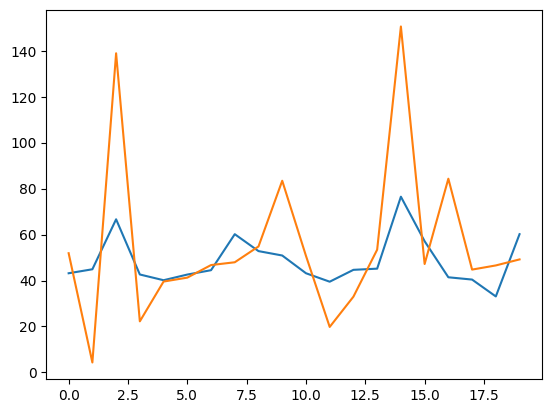

In [87]:
file_path = './source_data/A1.xlsx'
in_window_length = 20
out_window_length = 20 



data = pd.read_excel(file_path)
data.columns = ['date1','sample_code','name','sales','values']
data= data[data['values']>=0]
data['year'] = data['date1']//100
data['month'] = data['date1']%100
data = data[['year','month','sales','values']]
X = []
y = []

L = len(data)
for i in range(L):
    if i+in_window_length+out_window_length >= L:
        break
    X.append(data[i:i+in_window_length].values.tolist())
    y.append(data['sales'][i+in_window_length:i+in_window_length+out_window_length].values.tolist())

X = np.array(X)
X = X.reshape(X.shape[0],-1)



train_num = 60
X_train,y_train,X_test,y_test= X[:train_num],y[:train_num],X[train_num:],y[train_num:]

model = RandomForestRegressor(n_estimators=9,verbose=True)
model.fit(X_train,y_train)

print("total_mse:",mean_squared_error(y_test,model.predict(X_test)))

y_pred = model.predict(X_test[-3:-2])
print("mse:",mean_squared_error(y_test[-3:-2],y_pred))
plt.plot(range(len(y_pred[0])),y_pred[0])
plt.plot(range(len(y_test[-3:-2][0])),y_test[-3:-2][0])

In [102]:

file_path = './source_data/A1.xlsx'



data = pd.read_excel(file_path)
data.columns = ['date1','sample_code','name','sales','values']
data= data[data['values']>=0]
data['year'] = data['date1']//100
data['month'] = data['date1']%100
data = data[['year','month','sales','values']]


X = data[['year','month']]
y = data['sales']



train_num = 60
X_train,y_train,X_test,y_test= X[:train_num],y[:train_num],X[train_num:],y[train_num:]
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("mse:",mean_squared_error(y_test,y_pred))
# model = xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,early_stopping_rounds=10)
# model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)])

# y_pred = model.predict(X_test[-2:-1])
# print("mse:",mean_squared_error(y_test[-2:-1],y_pred))
# plt.plot(range(len(y_pred[0])),y_pred[0])
# plt.plot(range(len(y_test[-2:-1][0])),y_test[-2:-1][0])

mse: 2237.6297541997324


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from pycaret.regression import RegressionExperiment


file_path = './source_data/A1.xlsx'
in_window_length = 20
out_window_length = 20 



data = pd.read_excel(file_path)
data.columns = ['date1','sample_code','name','sales','values']
data= data[data['values']>=0]
data['year'] = data['date1']//100
data['month'] = data['date1']%100
data = data[['year','month','sales','values']]
X = []
y = []

L = len(data)
for i in range(L):
    if i+in_window_length+out_window_length >= L:
        break
    X.append(data[i:i+in_window_length].values.tolist())
    y.append(data['sales'][i+in_window_length:i+in_window_length+out_window_length].values.tolist())

X = np.array(X)
X = X.reshape(X.shape[0],-1)



train_num = 60
X_train,y_train,X_test,y_test= X[:train_num],y[:train_num],X[train_num:],y[train_num:]

s = RegressionExperiment()

